# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 12 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, RMSprop, Adadelta, Adagrad
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

## Esercizio 12.1: <span style="color:brown">  Deep Neural Network </span>
Si implementa una rete neurale profonda (DNN) per il riconoscimento delle cifre da 0 a 9 scritte a mano. Per farlo, dopo aver composto la rete, si sceglie di utilizzare il dataset **MNIST**, che contiene un gran numero di cifre scritte a mano. Questo verrà utilizzato sia per il training della rete che per i test.

Si confrontano le performance di vari ottimizzatori della libreria *Keras* durante il training della DNN.

In [3]:
#fix random seeds
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

img_rows, img_cols = 28, 28 #input image dimensions - number of pixels 
num_classes = 10 # 10 digits - output dimension (10 differet categories)

#the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [4]:
#reshape data
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

#cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#rescale data in interval [0,1] - X are in [0,255]
X_train /= 255
X_test /= 255

# look at an example of data point
#print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()

#convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [5]:
#function for creating a DNN with correct input shape and relu activation functions (last one is softmax)
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

#compile a new model
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model
#compile new model with Adagrad optimizer
def compile_model_Adagrad():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

#compile new model with Adadelta optimizer
def compile_model_ad():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['accuracy'])
    return model

#compile new model with RMSprop optimizer
def compile_model_RMS():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(learning_rate=0.0008),
                  metrics=['accuracy'])
    return model

### Primo ottimizzatore: SGD

In [6]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.7563 - accuracy: 0.7780 - val_loss: 0.3097 - val_accuracy: 0.9184
Epoch 2/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.3794 - accuracy: 0.8924 - val_loss: 0.2353 - val_accuracy: 0.9341
Epoch 3/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.3057 - accuracy: 0.9133 - val_loss: 0.1997 - val_accuracy: 0.9408
Epoch 4/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.2664 - accuracy: 0.9255 - val_loss: 0.1730 - val_accuracy: 0.9494
Epoch 5/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.2329 - accuracy: 0.9345 - val_loss: 0.1539 - val_accuracy: 0.9536
Epoch 6/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.2054 - accuracy: 0.9428 - val_loss: 0.1406 - val_accuracy: 0.9570
Epoch 7/20
60000/60000 [==============================]

10000/10000 [==============================] - 1s 84us/step

Test loss: 0.07317591402223333
Test accuracy: 0.9764000177383423


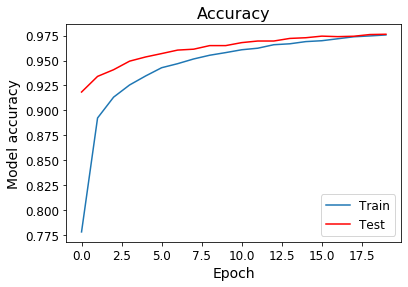

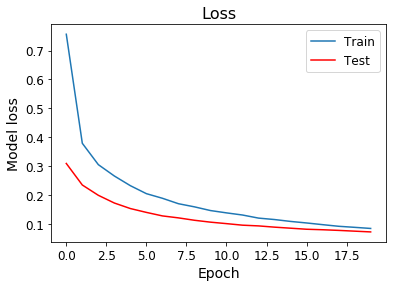

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

#print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color='red')
plt.title('Accuracy')
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color='red')
plt.title('Loss')
plt.ylabel('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [9]:
#print history for the model
#print(history.history)

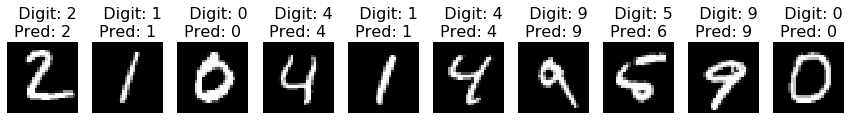

In [8]:
#make predictions using DNN and plot figure
predictions = model_DNN.predict(X_test)

X_test_plot = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_plot[i+1, :, :, 0], cmap='gray')    
    plt.title("  Digit: {}\nPred: {}".format(np.argmax(Y_test[i+1]), np.argmax(predictions[i+1])))   
    plt.axis('off') 
plt.show()

### Secondo ottimizzatore: Adadelta

In [9]:
#create new model with same parameters and Adadelta optimizer
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN_ad = compile_model_ad()

# train DNN and store training info in history
history_ad = model_DNN_ad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 404us/step - loss: 0.2906 - accuracy: 0.9149 - val_loss: 0.1198 - val_accuracy: 0.9639
Epoch 2/5
60000/60000 [==============================] - 24s 393us/step - loss: 0.1274 - accuracy: 0.9639 - val_loss: 0.0875 - val_accuracy: 0.9735
Epoch 3/5
60000/60000 [==============================] - 24s 399us/step - loss: 0.0949 - accuracy: 0.9736 - val_loss: 0.0792 - val_accuracy: 0.9757
Epoch 4/5
60000/60000 [==============================] - 23s 392us/step - loss: 0.0765 - accuracy: 0.9794 - val_loss: 0.0761 - val_accuracy: 0.9784
Epoch 5/5
60000/60000 [==============================] - 23s 388us/step - loss: 0.0644 - accuracy: 0.9815 - val_loss: 0.0722 - val_accuracy: 0.9800


10000/10000 [==============================] - 1s 79us/step

Test loss: 0.07224882279121775
Test accuracy: 0.9800000190734863


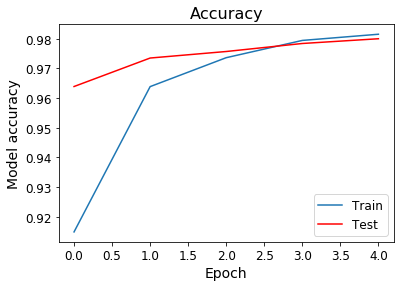

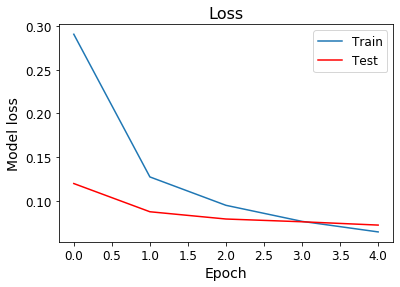

In [10]:
#evaluate model
score = model_DNN_ad.evaluate(X_test, Y_test, verbose=1)

#print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#summarize history for accuracy
plt.plot(history_ad.history['accuracy'])
plt.plot(history_ad.history['val_accuracy'], color='red')
plt.title('Accuracy')
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

#summarize history for loss
plt.plot(history_ad.history['loss'])
plt.plot(history_ad.history['val_loss'], color='red')
plt.title('Loss')
plt.ylabel('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

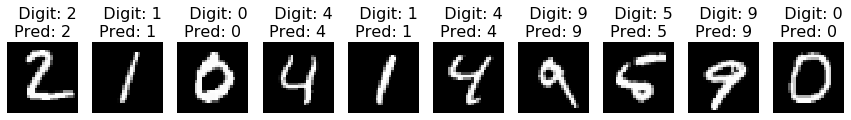

In [11]:
#make predictions using DNN and plot figure
predictions = model_DNN_ad.predict(X_test)

X_test_plot = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_plot[i+1, :, :, 0], cmap='gray')    
    plt.title("  Digit: {}\nPred: {}".format(np.argmax(Y_test[i+1]), np.argmax(predictions[i+1])))   
    plt.axis('off') 
plt.show()

### Terzo ottimizzatore: RMSprop

In [12]:
#create new model with same parameters and RMSprop optimizer
# training parameters
batch_size = 32
epochs = 4

# create the deep neural net
model_DNN_RMS = compile_model_RMS()

# train DNN and store training info in history
history_RMS = model_DNN_RMS.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 20s 327us/step - loss: 0.2983 - accuracy: 0.9137 - val_loss: 0.1211 - val_accuracy: 0.9670
Epoch 2/4
60000/60000 [==============================] - 18s 297us/step - loss: 0.1409 - accuracy: 0.9632 - val_loss: 0.1135 - val_accuracy: 0.9707
Epoch 3/4
60000/60000 [==============================] - 18s 306us/step - loss: 0.1219 - accuracy: 0.9701 - val_loss: 0.1168 - val_accuracy: 0.9739
Epoch 4/4
60000/60000 [==============================] - 19s 309us/step - loss: 0.1179 - accuracy: 0.9731 - val_loss: 0.1460 - val_accuracy: 0.9708


10000/10000 [==============================] - 1s 97us/step

Test loss: 0.14597913448633135
Test accuracy: 0.97079998254776


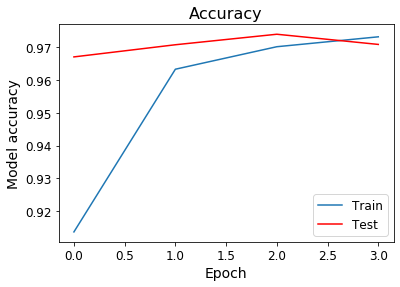

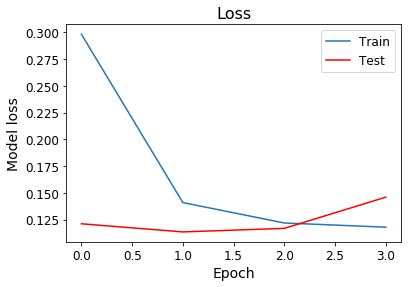

In [13]:
#evaluate model
score = model_DNN_RMS.evaluate(X_test, Y_test, verbose=1)

#print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#summarize history for accuracy
plt.plot(history_RMS.history['accuracy'])
plt.plot(history_RMS.history['val_accuracy'], color='red')
plt.title('Accuracy')
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

#summarize history for loss
plt.plot(history_RMS.history['loss'])
plt.plot(history_RMS.history['val_loss'], color='red')
plt.title('Loss')
plt.ylabel('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

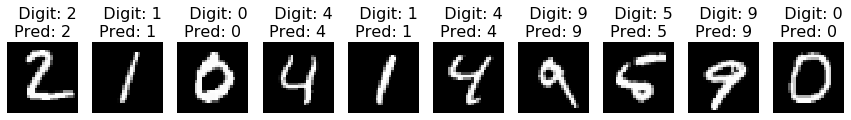

In [14]:
#make predictions using DNN and plot figure
predictions = model_DNN_ad.predict(X_test)

X_test_plot = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_plot[i+1, :, :, 0], cmap='gray')    
    plt.title("  Digit: {}\nPred: {}".format(np.argmax(Y_test[i+1]), np.argmax(predictions[i+1])))   
    plt.axis('off') 
plt.show()

### Quarto ottimizzatore: Adagrad

In [15]:
#create new model with same parameters and Adagrad optimizer
# training parameters
batch_size = 32
epochs = 6

# create the deep neural net
model_DNN_Adagrad = compile_model_Adagrad()

# train DNN and store training info in history
history_Adagrad = model_DNN_Adagrad.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 17s 291us/step - loss: 0.2805 - accuracy: 0.9205 - val_loss: 0.1234 - val_accuracy: 0.9622
Epoch 2/6
60000/60000 [==============================] - 17s 282us/step - loss: 0.1452 - accuracy: 0.9591 - val_loss: 0.0962 - val_accuracy: 0.9704
Epoch 3/6
60000/60000 [==============================] - 17s 285us/step - loss: 0.1134 - accuracy: 0.9679 - val_loss: 0.0855 - val_accuracy: 0.9744
Epoch 4/6
60000/60000 [==============================] - 17s 282us/step - loss: 0.0935 - accuracy: 0.9737 - val_loss: 0.0792 - val_accuracy: 0.9759
Epoch 5/6
60000/60000 [==============================] - 17s 283us/step - loss: 0.0817 - accuracy: 0.9774 - val_loss: 0.0727 - val_accuracy: 0.9782
Epoch 6/6
60000/60000 [==============================] - 17s 280us/step - loss: 0.0705 - accuracy: 0.9800 - val_loss: 0.0705 - val_accuracy: 0.9782


10000/10000 [==============================] - 1s 84us/step

Test loss: 0.07047412214693613
Test accuracy: 0.9782000184059143


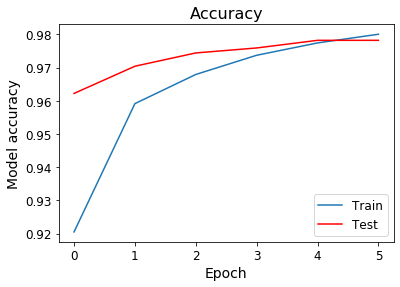

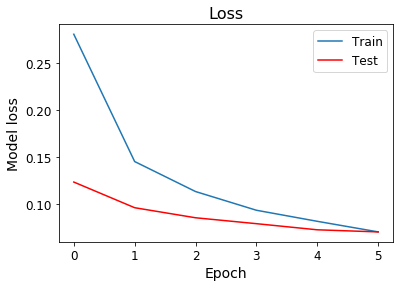

In [16]:
#evaluate model
score = model_DNN_Adagrad.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#summarize history for accuracy
plt.plot(history_Adagrad.history['accuracy'])
plt.plot(history_Adagrad.history['val_accuracy'], color='red')
plt.title('Accuracy')
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

#summarize history for loss
plt.plot(history_Adagrad.history['loss'])
plt.plot(history_Adagrad.history['val_loss'], color='red')
plt.title('Loss')
plt.ylabel('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

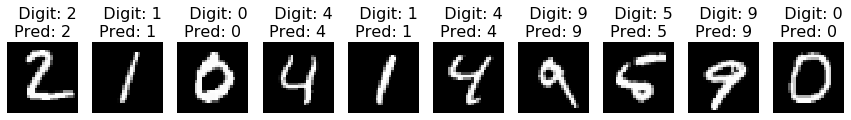

In [17]:
#make predictions using DNN and plot figure
predictions = model_DNN_Adagrad.predict(X_test)

X_test_plot = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_plot[i+1, :, :, 0], cmap='gray')    
    plt.title("  Digit: {}\nPred: {}".format(np.argmax(Y_test[i+1]), np.argmax(predictions[i+1])))   
    plt.axis('off') 
plt.show()

**Osservazione**: SGD è l'ottimizzatore che ha bisogno di più training, ma è anche il più veloce in ciascuna epoca. Tutti gli altri richiedono di avere al massimo un 5/6 epoche per evitare l'overtraining. Il migliore sembra essere *adadelta*, perchè ha l'accuratezza più alta e la loss più bassa, e il peggiore risulta essere RMSprop, perchè quasi a parità di accuratezza è quello con la loss più alta.

## Esercizio 12.2: <span style="color:brown"> Convolutional Neural Network </span>
Si vuole ripete lo stesso esercizio del punto precedente, questa volta utilizzando una *rete neurale convoluzionale* (CNN). In questo modo si ottiene una rete molto più complessa che ha il vantaggio di ottenere performance migliori.\
Si sceglie di utilizzare una rete con due layer convoluzionali (e rispettivi layer di maxpooling) a cui vengono aggiunti due layer densi, divisi da un layer di dropout.

In [18]:
#reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)

60000 train samples
10000 test samples


In [19]:
#function for the creation of a convolutional neural net
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 6 filters
    model.add(Conv2D(6, kernel_size=(5,5),
                     strides=(1,1),
                     padding='same',
                     activation='relu',
                     input_shape=input_shape))
    
    #add first max pooling to reduce the spatial dimensions (downsampling)
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    #add second convolutional layer
    model.add(Conv2D(16, kernel_size=(5,5),
                     strides=(1,1),
                     padding='valid',
                     activation='relu'))
    
    #add second maxpooling (downgrade again)
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    #flatten the model
    model.add(Flatten())

    #last dense layer
    model.add(Dense(20, activation='relu'))
    
    #one dropout layer (useful to prevent overfitting)
    model.add(Dropout(0.5))
              
    #output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    
#compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [20]:
# training parameters
batch_size = 50
epochs = 20

# create the deep conv net
model_CNN = create_CNN()
model_CNN.summary()

# train CNN
history_CNN = model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              shuffle=True,
              validation_data=(X_test, Y_test))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                8020      
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)              

10000/10000 [==============================] - 2s 218us/step

Test loss: 0.05741581729464233
Test accuracy: 0.9825000166893005


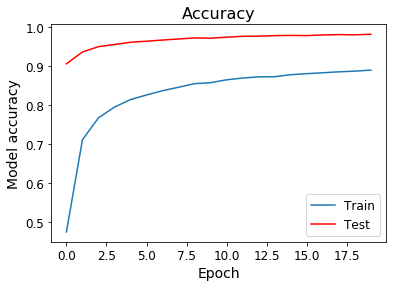

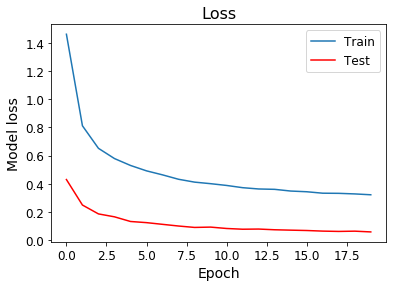

In [21]:
#evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

#print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#summarize history for accuracy
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'], color='red')
plt.title('Accuracy')
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

#summarize history for loss
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'], color='red')
plt.title('Loss')
plt.ylabel('Model loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

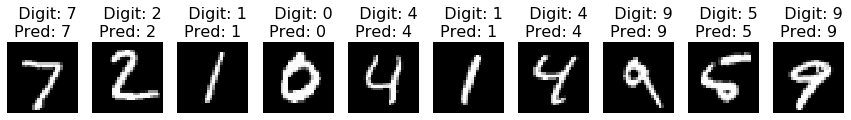

(10000, 28, 28, 1)


In [22]:
#make predictions using DNN and plot figure
predictions = model_CNN.predict(X_test)

X_test_plot = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test_plot[i, :, :, 0], cmap='gray')    
    plt.title("  Digit: {}\nPred: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))   
    plt.axis('off') 
plt.show()
print(X_test.shape)

In [23]:
#save the CNN
model_path='Saved_Models/my_CNN'
model_CNN.save(filepath=model_path, include_optimizer=True)

In [24]:
#restore CNN
#model_old = keras.models.load_model(filepath=model_path)

## Esercizio 12.3: <span style="color:brown">  Handwritten digits </span>
A questo punto si vuole provare la rete neurale convoluzionale, creata e allenata al punto precedente, su delle immagini scritte "a mano", al di fuori del dataset **MNIST**, e verificare quindi le performance della rete su un altro set di test.

In [25]:
N_im = 10

#load first digit (needed for np.colums_stack)
digit_filename = "CNN_0.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image 0 size: "+str(xdim)+"x"+str(ydim))
pix = digit_in.load();
data = np.zeros((1, xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[0,i,j] = pix[ j,i]
        
#load all other digits
for digit in range(1, N_im):
    digit_filename = "CNN_" + str(digit) + ".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    print("Image " + str(digit) + " size: " + str(xdim) + "x" + str(ydim))
    pix = digit_in.load();
    data_appo = np.zeros((1, xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data_appo[0,i,j] = pix[j,i]
            
#append new digit             
    data = np.concatenate((data, data_appo), axis=0)
    

data /= 255
print("Data shape:", data.shape)

#reshape data 
data = data.reshape(data.shape[0],28,28,1)

Image 0 size: 28x28
Image 1 size: 28x28
Image 2 size: 28x28
Image 3 size: 28x28
Image 4 size: 28x28
Image 5 size: 28x28
Image 6 size: 28x28
Image 7 size: 28x28
Image 8 size: 28x28
Image 9 size: 28x28
Data shape: (10, 28, 28)


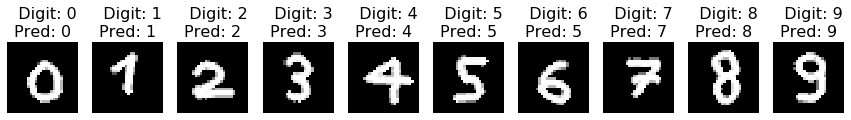

In [26]:
#use the CNN to predict the imported digits
predictions = model_CNN.predict(data)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i+1)    
    plt.imshow(data[i, :, :, 0], cmap='gray')    
    plt.title("  Digit: " + str(i) + "\nPred: {}".format(np.argmax(predictions[i])))   
    plt.axis('off') 
    
plt.show()